In [17]:
# Common Imports:
import pandas as pd
import numpy as np
import os

# To Plot Pretty Figures:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline 

# allowing for any single variable to print out without using the print statement:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [18]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    '''Just call this in any cell with a viz and send a string for the name of the image'''
    # if directory doesn't exist, make one:
    if not os.path.exists(IMAGES_PATH):
        os.makedirs(IMAGES_PATH)
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# to make this notebook's output stable across runs
np.random.seed(42)

In [19]:
# set default figure size...must set after matplotlib inline on a DIFFERENT cell
plt.rcParams['figure.figsize'] = (13, 8)

# change color palette
plt.style.use('seaborn-deep')

In [20]:
# importing our datasets - and combining them into one df:
df1 = pd.read_csv('adult.data', header = None)
df2 = pd.read_csv('adult.test', header = None)

df = pd.concat([df1, df2], ignore_index=True)

In [21]:
df.shape

(48842, 15)

In [22]:
# adding column names
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = columns

In [23]:
df.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [24]:
# checking datatypes
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [25]:
# running .str.strip() on all string objects
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

In [26]:
# describing the dataframe:
df.describe(include = 'all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,4
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,24720
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [27]:
df.workclass.value_counts()
df.occupation.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [28]:
# checking to see if the unknown rows line up:

'Workclass feature:'
df.loc[df.workclass == '?'].index

'Occupation feature'
df.loc[df.occupation == '?'].index

'Workclass feature:'

Int64Index([   27,    61,    69,    77,   106,   128,   149,   154,   160,
              187,
            ...
            48567, 48579, 48593, 48596, 48678, 48682, 48769, 48800, 48812,
            48838],
           dtype='int64', length=2799)

'Occupation feature'

Int64Index([   27,    61,    69,    77,   106,   128,   149,   154,   160,
              187,
            ...
            48567, 48579, 48593, 48596, 48678, 48682, 48769, 48800, 48812,
            48838],
           dtype='int64', length=2809)

In [29]:
# which rows are there that these don't line up?

unknown_occ = df.loc[df.occupation == '?']

unknown_occ.loc[unknown_occ.workclass != '?']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
5361,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K
41346,17,Never-worked,131593,11th,7,Never-married,?,Own-child,Black,Female,0,0,20,United-States,<=50K.
44168,20,Never-worked,273905,HS-grad,9,Married-spouse-absent,?,Other-relative,White,Male,0,0,35,United-States,<=50K.
46459,18,Never-worked,162908,11th,7,Never-married,?,Own-child,White,Male,0,0,35,United-States,<=50K.


In [30]:
df.loc[df.workclass == 'Never-worked', 'workclass'] = '?'

In [31]:
# checking out our target income class:
df.income.value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

In [32]:
# cleaning this up and removing the period from those stray values so our values line up better
df.loc[df.income == '<=50K.', 'income'] = '<=50K'
df.loc[df.income == '>50K.', 'income'] = '>50K'

In [33]:
# are there any other missing / null values?
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [34]:
# numerical summary of our data:
'age'
df.age.describe()

'workclass'
df.workclass.value_counts()

'education'
df.education.value_counts()

'education_num'
df.education_num.value_counts()

'marital_status'
df.marital_status.value_counts()

'occupation'
df.occupation.value_counts()

'relationship'
df.relationship.value_counts()

'race'
df.race.value_counts()

'sex'
df.sex.value_counts()

'capital_gain'
df.capital_gain.describe()

'capital_loss'
df.capital_loss.describe()

'hours_per_week'
df.hours_per_week.describe()

'top 10 native_country'
df.native_country.value_counts().head(10)

'income'
df.income.value_counts()

'age'

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

'workclass'

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2809
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Name: workclass, dtype: int64

'education'

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

'education_num'

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: education_num, dtype: int64

'marital_status'

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital_status, dtype: int64

'occupation'

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

'relationship'

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

'race'

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

'sex'

Male      32650
Female    16192
Name: sex, dtype: int64

'capital_gain'

count    48842.000000
mean      1079.067626
std       7452.019058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64

'capital_loss'

count    48842.000000
mean        87.502314
std        403.004552
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital_loss, dtype: float64

'hours_per_week'

count    48842.000000
mean        40.422382
std         12.391444
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

'top 10 native_country'

United-States    43832
Mexico             951
?                  857
Philippines        295
Germany            206
Puerto-Rico        184
Canada             182
El-Salvador        155
India              151
Cuba               138
Name: native_country, dtype: int64

'income'

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [36]:
# exporting this updated data for tableau visualization:
df.to_csv(path_or_buf="clean_adult_data.csv", index=False)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education_num'}>,
        <AxesSubplot:title={'center':'capital_gain'}>],
       [<AxesSubplot:title={'center':'capital_loss'}>,
        <AxesSubplot:title={'center':'hours_per_week'}>]], dtype=object)

Saving figure numerical_distributions


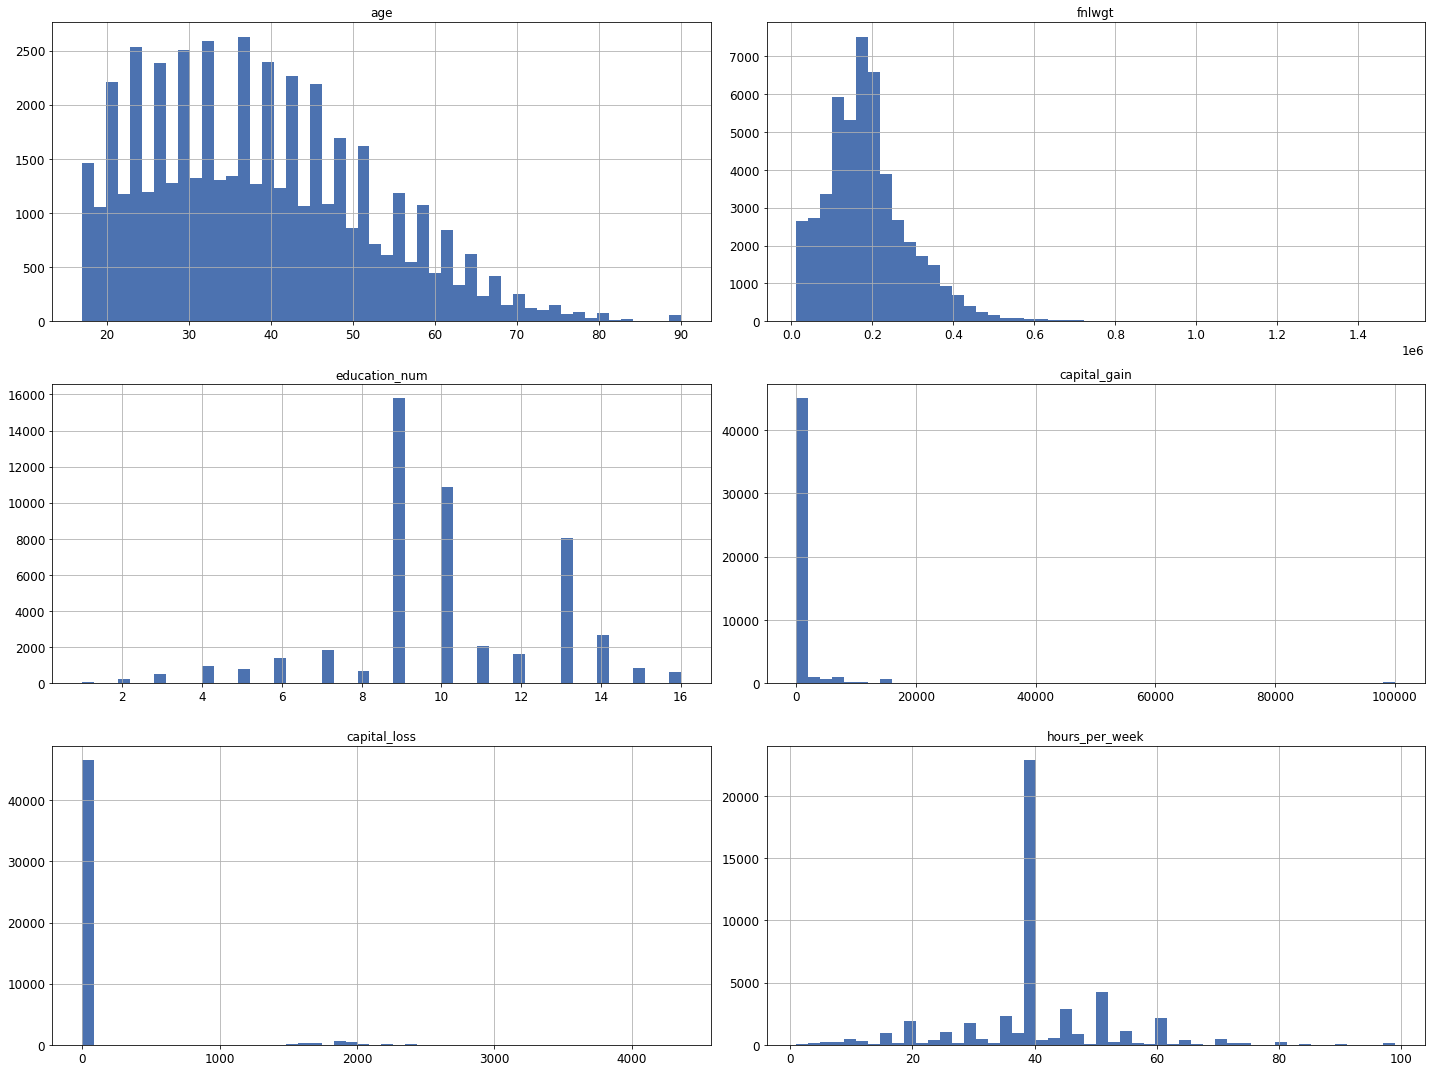

In [37]:
# distributions:
df.hist(bins=50, figsize=(20,15))
save_fig('numerical_distributions')

In [38]:
# making a copy of the dataframe:
train = df.copy()

In [39]:
train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [40]:
# education is not needed since education_num represents this ordinal column well
train.drop(columns=['education'], inplace=True)

In [41]:
# one-hot encoding all our nominal data columns leaving our first column as existent because we want all the variables there for our correlation maps:
train = pd.get_dummies(train, columns=['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'], drop_first=False)

In [42]:
# one-hot encoding our income data columns with dropping first = True because we only want ONE Y variable. Double Class classification:
train = pd.get_dummies(train, columns=['income'], drop_first=True)

In [43]:
train.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_>50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [44]:
train.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_?', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital_status_Divorced',
       'marital_status_Married-AF-spouse', 'marital_status_Married-civ-spouse',
       'marital_status_Married-spouse-absent', 'marital_status_Never-married',
       'marital_status_Separated', 'marital_status_Widowed', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_

<Figure size 864x864 with 0 Axes>

Text(0.5, 1.05, 'Pearson Correlation of Features')

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

Saving figure 01_correlation


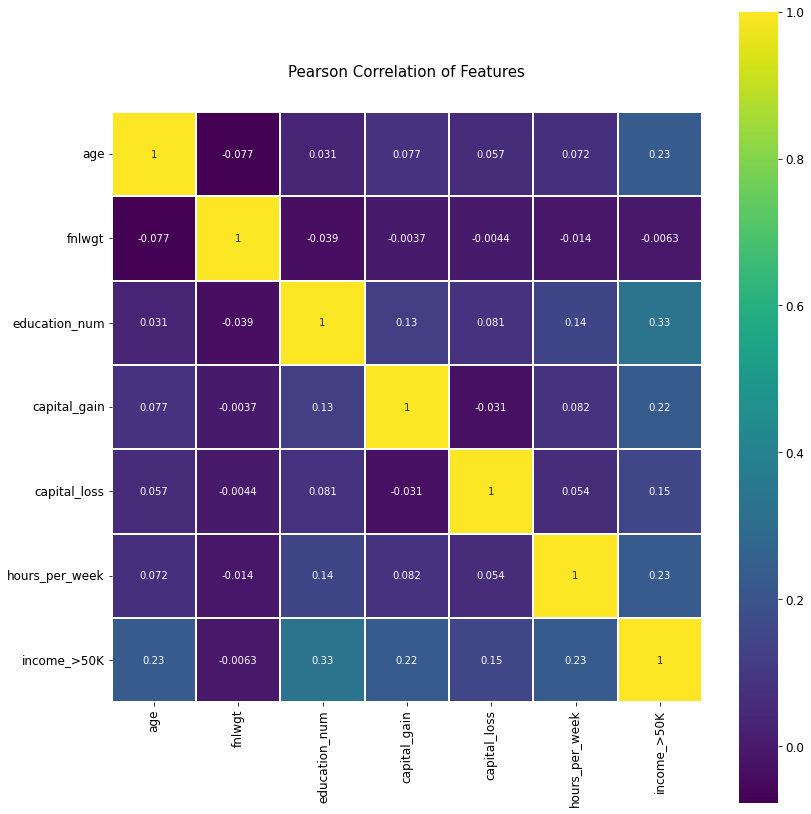

In [45]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.iloc[:,[0, 1, 2, 3, 4, 5, -1]].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
save_fig('01_correlation')

<Figure size 864x864 with 0 Axes>

Text(0.5, 1.05, 'WorkClass Correlation')

<AxesSubplot:title={'center':'WorkClass Correlation'}>

Saving figure 02_correlation


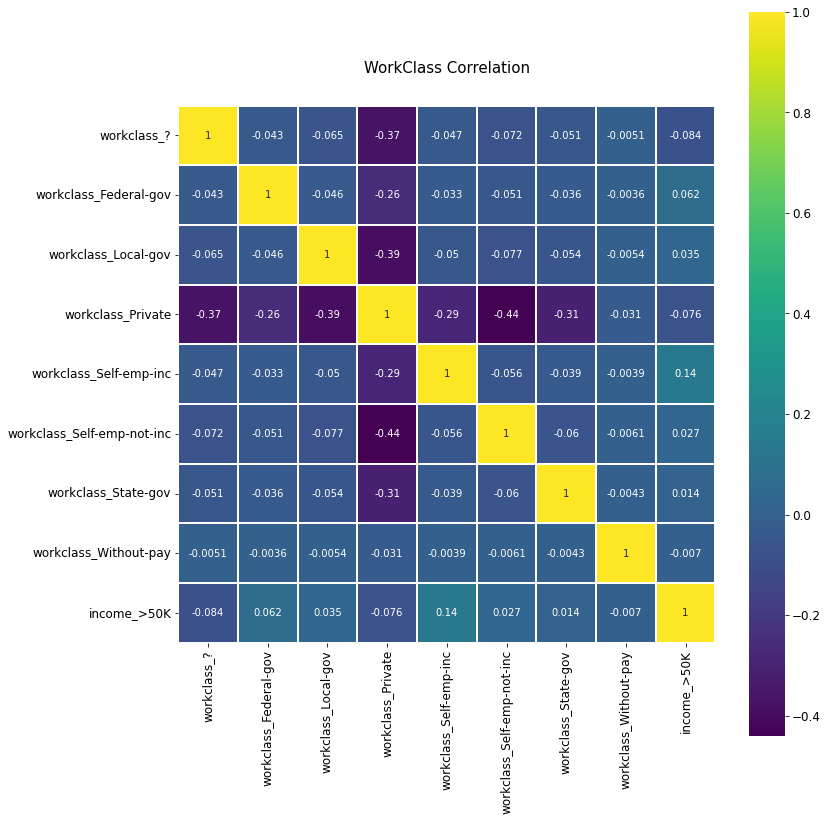

In [46]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('WorkClass Correlation', y=1.05, size=15)
sns.heatmap(
    train.loc[:, train.columns.str.contains('workclass') | train.columns.str.contains('income')].corr(),
    linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
save_fig('02_correlation')

<Figure size 864x864 with 0 Axes>

Text(0.5, 1.05, 'Marital Correlation')

<AxesSubplot:title={'center':'Marital Correlation'}>

Saving figure 03_correlation


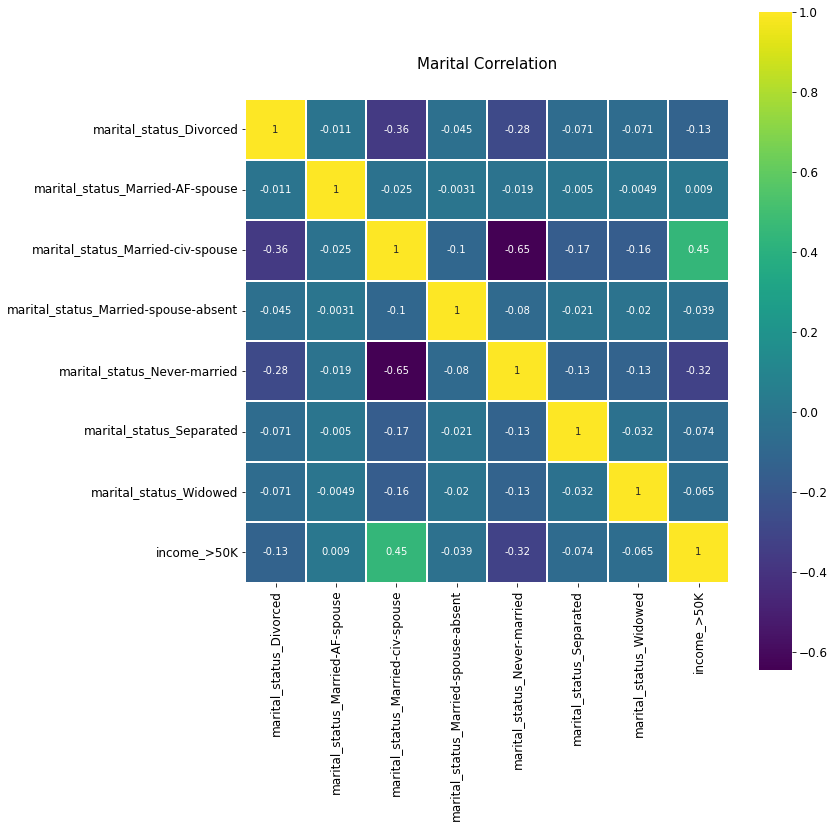

In [47]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Marital Correlation', y=1.05, size=15)
sns.heatmap(
    train.loc[:, train.columns.str.contains('marital_status') | train.columns.str.contains('income')].corr(),
    linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
save_fig('03_correlation')

<Figure size 864x864 with 0 Axes>

Text(0.5, 1.05, 'Occupation Correlation')

<AxesSubplot:title={'center':'Occupation Correlation'}>

Saving figure 04_correlation


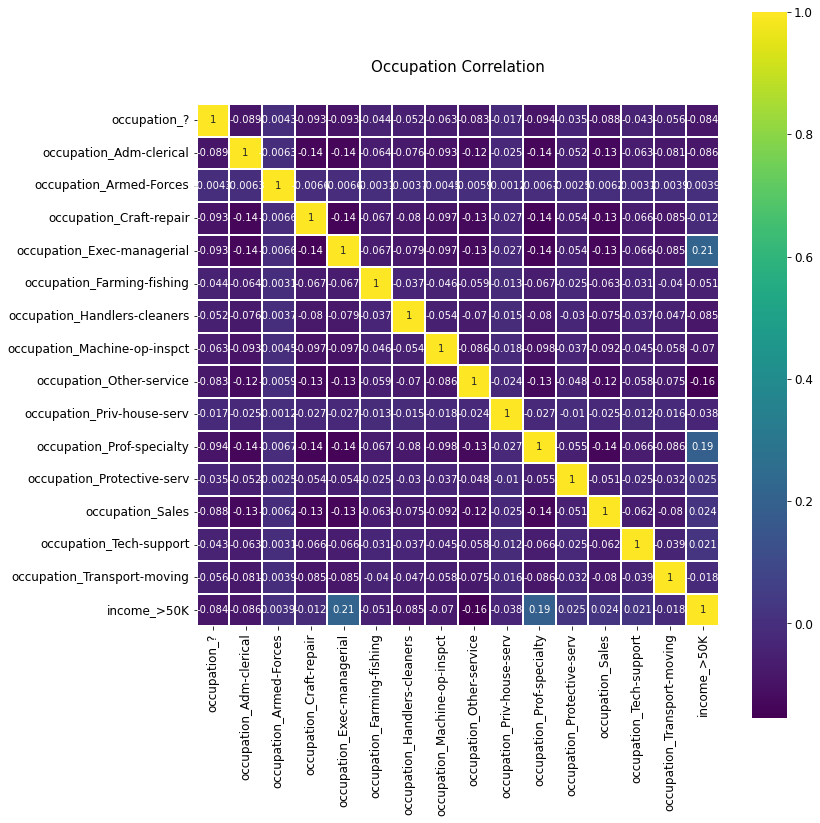

In [48]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Occupation Correlation', y=1.05, size=15)
sns.heatmap(
    train.loc[:, train.columns.str.contains('occupation') | train.columns.str.contains('income')].corr(),
    linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
save_fig('04_correlation')

<Figure size 864x864 with 0 Axes>

Text(0.5, 1.05, 'Relationship Correlation')

<AxesSubplot:title={'center':'Relationship Correlation'}>

Saving figure 05_correlation


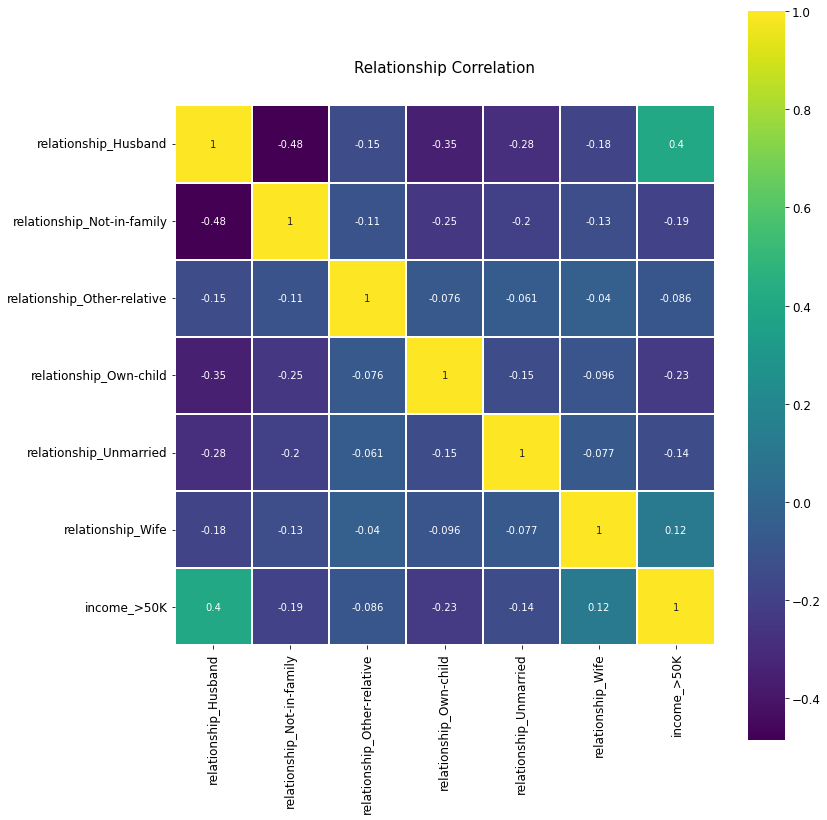

In [49]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Relationship Correlation', y=1.05, size=15)
sns.heatmap(
    train.loc[:, train.columns.str.contains('income') | train.columns.str.contains('relationship')].corr(),
    linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
save_fig('05_correlation')

<Figure size 864x864 with 0 Axes>

Text(0.5, 1.05, 'Marital / Relationship / Sex Co-Correlation')

<AxesSubplot:title={'center':'Marital / Relationship / Sex Co-Correlation'}>

Saving figure 06_correlation


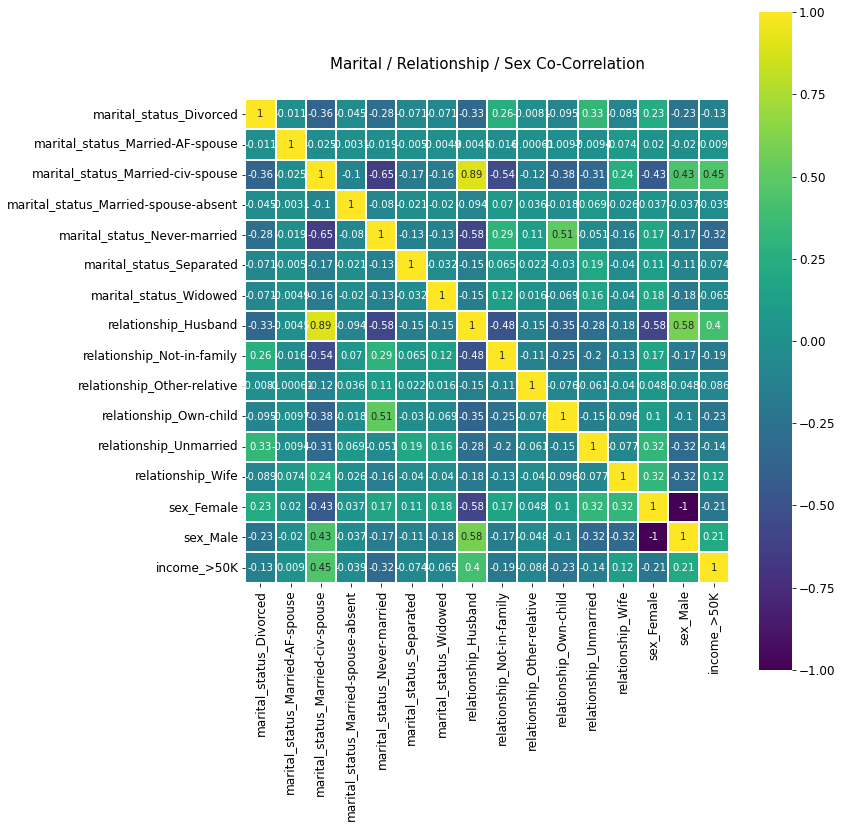

In [50]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Marital / Relationship / Sex Co-Correlation', y=1.05, size=15)
sns.heatmap(
    train.loc[:, train.columns.str.contains('marital_status') | train.columns.str.contains('relationship') | train.columns.str.contains('sex') | train.columns.str.contains('income')].corr() ,
    linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
save_fig('06_correlation')

In [51]:
# removing all the marital and sex features
train = train.loc[:, (train.columns.str.contains('marital_status') == False) & (train.columns.str.contains('sex') == False)]

<Figure size 864x864 with 0 Axes>

Text(0.5, 1.05, 'Workclass / Occupation Co-Correlation')

<AxesSubplot:title={'center':'Workclass / Occupation Co-Correlation'}>

Saving figure 07_correlation


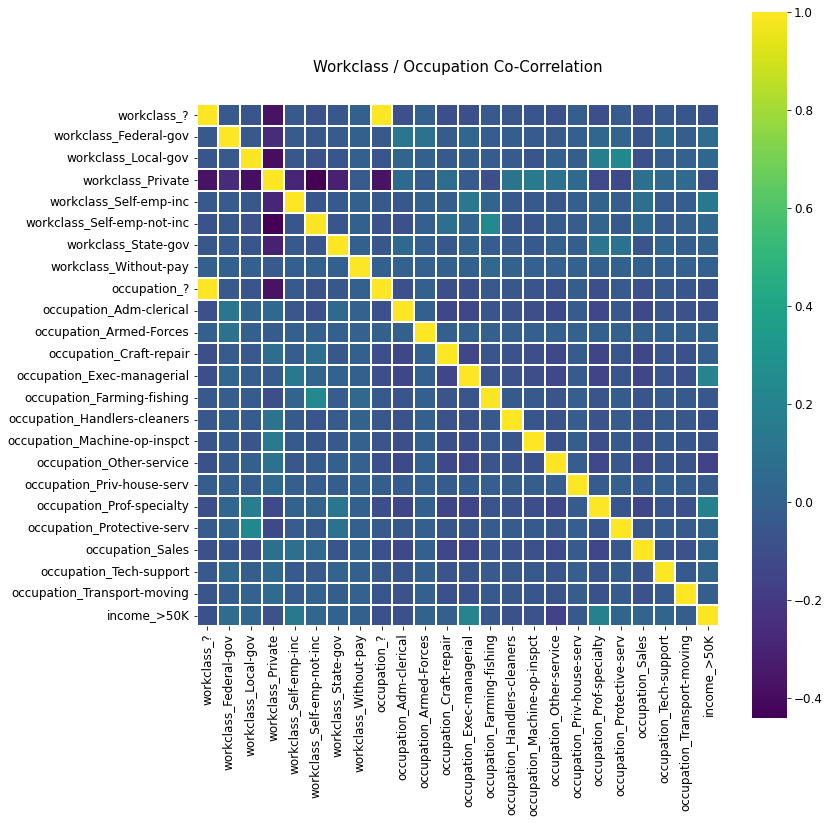

In [52]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Workclass / Occupation Co-Correlation', y=1.05, size=15)
sns.heatmap(
    train.loc[:, train.columns.str.contains('workclass') | train.columns.str.contains('occupation') | train.columns.str.contains('income')].corr(),
    linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=False)
save_fig('07_correlation')

In [53]:
# removing all the workclass features
train = train.loc[:, train.columns.str.contains('workclass') == False]

<Figure size 864x864 with 0 Axes>

Text(0.5, 1.05, 'Race / Native Country Co-Correlation')

<AxesSubplot:title={'center':'Race / Native Country Co-Correlation'}>

Saving figure 08_correlation


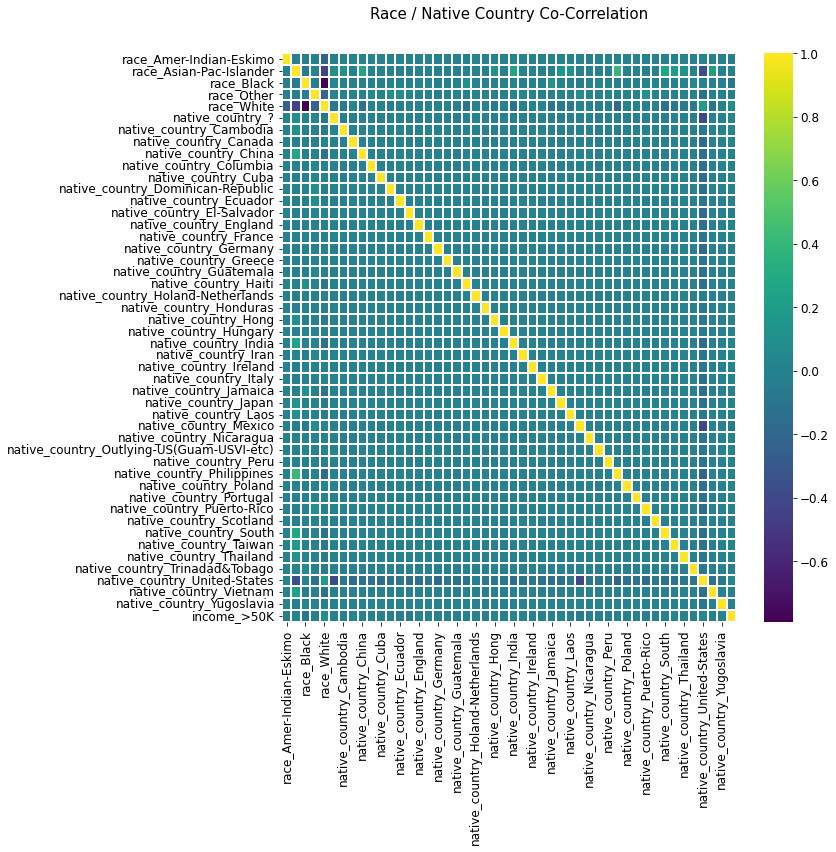

In [54]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Race / Native Country Co-Correlation', y=1.05, size=15)
sns.heatmap(
    train.loc[:, train.columns.str.contains('race') | train.columns.str.contains('native') | train.columns.str.contains('income')].corr(),
    linewidths=0.1,vmax=1.0, square=False, cmap=colormap, linecolor='white', annot=False)
save_fig('08_correlation')

In [55]:
# removing all the native_country features
train = train.loc[:, train.columns.str.contains('native') == False]

In [56]:
# let's remove fnlwght because it is not relevant to a particular individual - it represents what percentage of the population that individual represents. ALSO - there is no correlation between fnlwght and income.

train.drop(columns=['fnlwgt'], inplace=True)

In [57]:
###### SPLITTING OUR DATA INTO X AND Y:
X = train.iloc[:, 0:-1]
y = train.iloc[:, -1]

In [58]:
# Import module to split dataset into train and test
from sklearn.model_selection import train_test_split

# Split data set into training and test sets - setting random state to make the results replicable
### NOTE: might have to reshape some columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [59]:
# Accuracy score:
from sklearn.metrics import accuracy_score

In [60]:
from sklearn import tree

# Create Decision Tree with max_depth = 4 - can use grid search or cross validation later to find best max depth
decision_tree = tree.DecisionTreeClassifier(max_depth = 4)

# fit our model using our training data
decision_tree.fit(X_train, y_train)

y_pred_tree = decision_tree.predict(X_test)

DecisionTreeClassifier(max_depth=4)

In [61]:
'Accuracy of our tree model'
f'{round(accuracy_score(y_test, y_pred_tree) * 100, 2)} %'

'Accuracy of our tree model'

'84.54 %'

In [62]:
# Export our trained model as a .dot file - recall decisiontree is a WHITEBOX model so we can see what it did here!
with open("images/tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 3,
                              impurity = True,
                              feature_names = list(train.drop(['income_>50K'], axis=1)),
                              class_names = ['income_<=50K', 'income_>50K'],
                              rounded = True,
                              filled= True )

In [63]:
# Logistic Regression:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
y_pred_log = logmodel.predict(X_test)

'Logistic Regression Accuracy:'
f'{round(accuracy_score(y_test, y_pred_log) * 100, 2)} %'

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

'Logistic Regression Accuracy:'

'83.44 %'

In [64]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

'KNN Accuracy:'
f'{round(accuracy_score(y_test, y_pred_knn) * 100, 2)} %'

KNeighborsClassifier(n_neighbors=4)

'KNN Accuracy:'

'84.46 %'

In [65]:
# SVM
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

'SVM Accuracy:'
f'{round(accuracy_score(y_test, y_pred_svm) * 100, 2)} %'

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

'SVM Accuracy:'

'76.66 %'

In [66]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

'Random Forest Accuracy:'
f'{round(accuracy_score(y_test, y_pred_rf) * 100, 2)} %'

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

'Random Forest Accuracy:'

'84.91 %'

In [67]:
# printing out the feature importances. The score which is the highest is the root split - the most correlative feature that splits the most.

rndf_namescore = {}

for name, score in zip(train.columns, rnd_clf.feature_importances_):
    rndf_namescore[name] = score

# sorting by value in reverse order
rndf_namescore = sorted(rndf_namescore.items(), key=lambda kv: kv[1], reverse=True)

# printing it:
"Most important features that can predict income ranked:"
rndf_namescore

'Most important features that can predict income ranked:'

[('relationship_Husband', 0.24022227776617516),
 ('capital_gain', 0.19743727403627379),
 ('education_num', 0.16012239751917656),
 ('age', 0.08209723212060081),
 ('hours_per_week', 0.057935631996301425),
 ('relationship_Not-in-family', 0.048652007665466804),
 ('occupation_Exec-managerial', 0.04085603962006726),
 ('relationship_Own-child', 0.03805349249015409),
 ('capital_loss', 0.035529101291071084),
 ('occupation_Prof-specialty', 0.03096150215185157),
 ('relationship_Wife', 0.021919831634146594),
 ('relationship_Unmarried', 0.020769784563870804),
 ('occupation_Other-service', 0.008727043626343819),
 ('relationship_Other-relative', 0.0027518698284069183),
 ('occupation_Farming-fishing', 0.002428042372727218),
 ('occupation_Machine-op-inspct', 0.0015411069020197397),
 ('race_Black', 0.0015019556155161813),
 ('occupation_Handlers-cleaners', 0.0014354414852047325),
 ('occupation_?', 0.0013628680389581103),
 ('occupation_Craft-repair', 0.001200589815687636),
 ('occupation_Sales', 0.00110208

In [68]:
# ENSEMBLE Model of all the 5 above with Hard Voting:
from sklearn.ensemble import VotingClassifier

# passing our previous models to our ensemble model:
voting_clf = VotingClassifier(
    estimators=[('dt', decision_tree), ('lr', logmodel), ('kn', knn), ('svm', svm_model), ('rf', rnd_clf)],
    voting='hard')

# fit the ensemble
voting_clf.fit(X_train, y_train)

# predicting the ensemble
y_pred_ensemble = voting_clf.predict(X_test)

'Ensemble Accuracy:'
f'{round(accuracy_score(y_test, y_pred_ensemble) * 100, 2)} %'

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


VotingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=4)),
                             ('lr', LogisticRegression()),
                             ('kn', KNeighborsClassifier(n_neighbors=4)),
                             ('svm', LinearSVC()),
                             ('rf',
                              RandomForestClassifier(max_leaf_nodes=16,
                                                     n_estimators=500,
                                                     n_jobs=-1,
                                                     random_state=42))])

'Ensemble Accuracy:'

'85.0 %'

In [69]:
# ENSEMBLE Model of 4 out of 5 above with Soft Voting since svm doesn't go through soft voting well since linearsvc doesn't allow predict_prob_

voting_clf_soft = VotingClassifier(
    estimators=[('dt', decision_tree), ('lr', logmodel), ('kn', knn), ('rf', rnd_clf)],
    voting='soft')

# fit the ensemble
voting_clf_soft.fit(X_train, y_train)

# predicting the ensemble
y_pred_ensemble_soft = voting_clf_soft.predict(X_test)

'Ensemble (Soft Voting) Accuracy:'
f'{round(accuracy_score(y_test, y_pred_ensemble_soft) * 100, 2)} %'

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=4)),
                             ('lr', LogisticRegression()),
                             ('kn', KNeighborsClassifier(n_neighbors=4)),
                             ('rf',
                              RandomForestClassifier(max_leaf_nodes=16,
                                                     n_estimators=500,
                                                     n_jobs=-1,
                                                     random_state=42))],
                 voting='soft')

'Ensemble (Soft Voting) Accuracy:'

'85.66 %'

In [70]:
### BAGGING ensemble with decision trees:
from sklearn.ensemble import BaggingClassifier

bag_clf_tree = BaggingClassifier(
    tree.DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf_tree.fit(X_train, y_train)
y_pred_bag_tree = bag_clf_tree.predict(X_test)

'Bagging Ensemble Decision Tree Accuracy:'
f'{round(accuracy_score(y_test, y_pred_bag_tree) * 100, 2)} %'

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1,
                  random_state=42)

'Bagging Ensemble Decision Tree Accuracy:'

'84.7 %'

In [71]:
### BAGGING ensemble with random forest:
bag_clf_rf = BaggingClassifier(
    RandomForestClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf_rf.fit(X_train, y_train)
y_pred_bag_rf = bag_clf_rf.predict(X_test)

'Bagging Ensemble Random Forest Accuracy:'
f'{round(accuracy_score(y_test, y_pred_bag_rf) * 100, 2)} %'

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1,
                  random_state=42)

'Bagging Ensemble Random Forest Accuracy:'

'83.61 %'

In [72]:
### BAGGING ensemble with Logistic Regression:
bag_clf_lr = BaggingClassifier(
    LogisticRegression(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf_lr.fit(X_train, y_train)
y_pred_bag_lr = bag_clf_lr.predict(X_test)

'Bagging Ensemble Logistic Regression Accuracy:'
f'{round(accuracy_score(y_test, y_pred_bag_lr) * 100, 2)} %'

BaggingClassifier(base_estimator=LogisticRegression(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1,
                  random_state=42)

'Bagging Ensemble Logistic Regression Accuracy:'

'82.58 %'

In [73]:
### BAGGING ensemble with KNN:
bag_clf_knn = BaggingClassifier(
    KNeighborsClassifier(n_neighbors=4), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf_knn.fit(X_train, y_train)
y_pred_bag_knn = bag_clf_knn.predict(X_test)

'Bagging Ensemble KNN Accuracy:'
f'{round(accuracy_score(y_test, y_pred_bag_knn) * 100, 2)} %'

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=4),
                  max_samples=100, n_estimators=500, n_jobs=-1,
                  random_state=42)

'Bagging Ensemble KNN Accuracy:'

'81.15 %'

In [74]:
# ADABoost Classifier with decision trees
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=2), n_estimators=200,learning_rate=0.5, random_state=42)

ada_clf.fit(X_train, y_train)

y_pred_adab_dtree = ada_clf.predict(X_test)

'ADABoost Classifier with Decision Tree Accuracy:'
f'{round(accuracy_score(y_test, y_pred_adab_dtree) * 100, 2)} %'

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.5, n_estimators=200, random_state=42)

'ADABoost Classifier with Decision Tree Accuracy:'

'86.96 %'

In [75]:
import pickle
pickle.dump(ada_clf, open("adaboost_classificationmodel.pkl","wb"))

In [76]:
pip install keras

In [77]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [78]:
# import keras libraries

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [79]:
# Initialising the ANN - start the sequential model
classifier = Sequential()

# Adding the input layer AND the first hidden layer. Kernal initializer initializes the input weights for uniform distribution.
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 31))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [80]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)

Epoch 1/10
3908/3908 [==============================] - 6s 1ms/step - loss: 0.4877 - accuracy: 0.7947
Epoch 2/10
3908/3908 [==============================] - 6s 2ms/step - loss: 0.3845 - accuracy: 0.7967
Epoch 3/10
3908/3908 [==============================] - 6s 1ms/step - loss: 0.3676 - accuracy: 0.7977
Epoch 4/10
3908/3908 [==============================] - 8s 2ms/step - loss: 0.3624 - accuracy: 0.8063
Epoch 5/10
3908/3908 [==============================] - 7s 2ms/step - loss: 0.3666 - accuracy: 0.8147
Epoch 6/10
3908/3908 [==============================] - 7s 2ms/step - loss: 0.3671 - accuracy: 0.8216
Epoch 7/10
3908/3908 [==============================] - 7s 2ms/step - loss: 0.3658 - accuracy: 0.8217
Epoch 8/10
3908/3908 [==============================] - 7s 2ms/step - loss: 0.3664 - accuracy: 0.8211
Epoch 9/10
3908/3908 [==============================] - 7s 2ms/step - loss: 0.3616 - accuracy: 0.8237
Epoch 10/10
3908/3908 [==============================] - 6s 2ms/step - loss: 0.356

In [81]:
# Predicting the Test set results
y_pred_ann = classifier.predict(X_test)

306/306 [==============================] - 16s 1ms/step


In [82]:
# this is applying the threshold, if it's above 0.5, then it will be True - Person made over 50k
y_pred_ann = (y_pred_ann > 0.5)

In [83]:
y_pred_ann

array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [84]:
# classification report for our models
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

"Decision Tree Accuracy and Classification Report:"
f'{round(accuracy_score(y_test, y_pred_tree) * 100, 2)} %'
print(classification_report(y_test, y_pred_tree))

"Logistic Regression Accuracy and Classification Report:"
f'{round(accuracy_score(y_test, y_pred_log) * 100, 2)} %'
print(classification_report(y_test, y_pred_log))

'KNN Accuracy and Classification Report:'
f'{round(accuracy_score(y_test, y_pred_knn) * 100, 2)} %'
print(classification_report(y_test, y_pred_knn))

'SVM Accuracy and Classification Report:'
f'{round(accuracy_score(y_test, y_pred_svm) * 100, 2)} %'
print(classification_report(y_test, y_pred_svm))

'Random Forest Accuracy and Classification Report:'
f'{round(accuracy_score(y_test, y_pred_rf) * 100, 2)} %'
print(classification_report(y_test, y_pred_rf))

'Ensemble (Hard Voting) Accuracy and Classification Report:'
f'{round(accuracy_score(y_test, y_pred_ensemble) * 100, 2)} %'
print(classification_report(y_test, y_pred_ensemble))

'Ensemble (Soft Voting) Accuracy and Classification Report:'
f'{round(accuracy_score(y_test, y_pred_ensemble_soft) * 100, 2)} %'
print(classification_report(y_test, y_pred_ensemble_soft))

'Bagging Ensemble Decision Tree Accuracy:'
f'{round(accuracy_score(y_test, y_pred_bag_tree) * 100, 2)} %'
print(classification_report(y_test, y_pred_bag_tree))

'Bagging Ensemble Random Forest Accuracy:'
f'{round(accuracy_score(y_test, y_pred_bag_rf) * 100, 2)} %'
print(classification_report(y_test, y_pred_bag_rf))

'Bagging Ensemble Logistic Regression Accuracy:'
f'{round(accuracy_score(y_test, y_pred_bag_lr) * 100, 2)} %'
print(classification_report(y_test, y_pred_bag_lr))

'Bagging Ensemble KNN Accuracy:'
f'{round(accuracy_score(y_test, y_pred_bag_knn) * 100, 2)} %'
print(classification_report(y_test, y_pred_bag_knn))

'Deep Learning - Sequential Neural netwAccuracy:'
f'{round(accuracy_score(y_test, y_pred_bag_knn) * 100, 2)} %'
print(classification_report(y_test, y_pred_bag_knn))

'ADABoost Classifier with Decision Tree Accuracy:'
f'{round(accuracy_score(y_test, y_pred_adab_dtree) * 100, 2)} %'
print(classification_report(y_test, y_pred_adab_dtree))

'ADABoost CONFUSION MATRIX:'
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_log).ravel()
'TRUE POSITIVES | FALSE NEGATIVES'
'FALSE POSITIVES | TRUE NEGATIVES'
tp, fn
fp, tp

'Decision Tree Accuracy and Classification Report:'

'84.54 %'

              precision    recall  f1-score   support

           0       0.86      0.96      0.90      7383
           1       0.79      0.51      0.61      2386

    accuracy                           0.85      9769
   macro avg       0.82      0.73      0.76      9769
weighted avg       0.84      0.85      0.83      9769



'Logistic Regression Accuracy and Classification Report:'

'83.44 %'

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7383
           1       0.79      0.44      0.56      2386

    accuracy                           0.83      9769
   macro avg       0.81      0.70      0.73      9769
weighted avg       0.83      0.83      0.82      9769



'KNN Accuracy and Classification Report:'

'84.46 %'

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7383
           1       0.76      0.53      0.63      2386

    accuracy                           0.84      9769
   macro avg       0.81      0.74      0.76      9769
weighted avg       0.84      0.84      0.83      9769



'SVM Accuracy and Classification Report:'

'76.66 %'

              precision    recall  f1-score   support

           0       0.77      0.98      0.86      7383
           1       0.64      0.10      0.17      2386

    accuracy                           0.77      9769
   macro avg       0.71      0.54      0.52      9769
weighted avg       0.74      0.77      0.70      9769



'Random Forest Accuracy and Classification Report:'

'84.91 %'

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      7383
           1       0.84      0.47      0.61      2386

    accuracy                           0.85      9769
   macro avg       0.84      0.72      0.76      9769
weighted avg       0.85      0.85      0.83      9769



'Ensemble (Hard Voting) Accuracy and Classification Report:'

'85.0 %'

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      7383
           1       0.85      0.47      0.60      2386

    accuracy                           0.85      9769
   macro avg       0.85      0.72      0.76      9769
weighted avg       0.85      0.85      0.83      9769



'Ensemble (Soft Voting) Accuracy and Classification Report:'

'85.66 %'

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      7383
           1       0.83      0.51      0.64      2386

    accuracy                           0.86      9769
   macro avg       0.85      0.74      0.77      9769
weighted avg       0.85      0.86      0.84      9769



'Bagging Ensemble Decision Tree Accuracy:'

'84.7 %'

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7383
           1       0.78      0.52      0.63      2386

    accuracy                           0.85      9769
   macro avg       0.82      0.74      0.76      9769
weighted avg       0.84      0.85      0.84      9769



'Bagging Ensemble Random Forest Accuracy:'

'83.61 %'

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      7383
           1       0.81      0.43      0.56      2386

    accuracy                           0.84      9769
   macro avg       0.82      0.70      0.73      9769
weighted avg       0.83      0.84      0.82      9769



'Bagging Ensemble Logistic Regression Accuracy:'

'82.58 %'

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7383
           1       0.75      0.43      0.55      2386

    accuracy                           0.83      9769
   macro avg       0.79      0.69      0.72      9769
weighted avg       0.82      0.83      0.81      9769



'Bagging Ensemble KNN Accuracy:'

'81.15 %'

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      7383
           1       0.89      0.26      0.40      2386

    accuracy                           0.81      9769
   macro avg       0.85      0.63      0.65      9769
weighted avg       0.83      0.81      0.77      9769



'Deep Learning - Sequential Neural netwAccuracy:'

'81.15 %'

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      7383
           1       0.89      0.26      0.40      2386

    accuracy                           0.81      9769
   macro avg       0.85      0.63      0.65      9769
weighted avg       0.83      0.81      0.77      9769



'ADABoost Classifier with Decision Tree Accuracy:'

'86.96 %'

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7383
           1       0.80      0.63      0.70      2386

    accuracy                           0.87      9769
   macro avg       0.84      0.79      0.81      9769
weighted avg       0.86      0.87      0.86      9769



'ADABoost CONFUSION MATRIX:'

'TRUE POSITIVES | FALSE NEGATIVES'

'FALSE POSITIVES | TRUE NEGATIVES'

(1050, 1336)

(282, 1050)